# Top 10 Stations Analysis

## Packages and Config

In [21]:
#Required Packages
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import pickle

In [22]:
#Setup Configs
%config InlineBackend.figure_format = 'png' #svg breaks my UI
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

## Data Import

In [23]:
with open('pickle/mta_data_daily.pickle', 'rb') as to_read: #run scrape_data to generate
    mta_data_daily = pickle.load(to_read)

with open('pickle/mta_data_intra.pickle', 'rb') as to_read: #run scrape_data to generate
    mta_data_intra = pickle.load(to_read)
    
with open('pickle/top10.pickle', 'rb') as to_read: #run station_ranking to generate
    top10 = pickle.load(to_read) 

## Data Prep

### Daily Data

In [24]:
mta_data_daily.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME_DELTA,ENTRIES_DELTA,EXITS_DELTA,TOTAL_DELTA
0,A002,R051,02-00-00,59 ST,NQR456W,2019-03-30,1 days,893.0,299.0,1192.0
1,A002,R051,02-00-00,59 ST,NQR456W,2019-03-31,1 days,571.0,228.0,799.0
2,A002,R051,02-00-00,59 ST,NQR456W,2019-04-02,1 days,1593.0,554.0,2147.0
3,A002,R051,02-00-00,59 ST,NQR456W,2019-04-03,1 days,1652.0,424.0,2076.0
4,A002,R051,02-00-00,59 ST,NQR456W,2019-04-04,1 days,1638.0,511.0,2149.0


In [25]:
mta_data_daily_station = mta_data_daily.groupby(['STATION', 'DATE'])['TOTAL_DELTA'].sum().reset_index()
mta_data_daily_station.head()

,STATION,DATE,TOTAL_DELTA
0,1 AV,2019-03-30,32582.0
1,1 AV,2019-03-31,23767.0
2,1 AV,2019-04-01,41797.0
3,1 AV,2019-04-02,40623.0
4,1 AV,2019-04-03,39438.0


In [26]:
top10_daily = mta_data_daily_station.loc[mta_data_daily_station['STATION'].isin(top10)]
top10_daily['weekday'] = top10_daily['DATE'].apply(lambda date: date.weekday())
top10_daily.head()

/Users/alexanderparker/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATION,DATE,TOTAL_DELTA,weekday
536,125 ST,2019-03-30,102669.0,5
537,125 ST,2019-03-31,73910.0,6
538,125 ST,2019-04-01,139874.0,0
539,125 ST,2019-04-02,139979.0,1
540,125 ST,2019-04-03,146198.0,2


### Intraday Data

In [27]:
mta_data_intra.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATETIME,DATE,TIME,TIME_DELTA,ENTRIES_DELTA,EXITS_DELTA,TOTAL_DELTA
0,A002,R051,02-00-00,59 ST,NQR456W,2019-03-30 00:00:00,2019-03-30,00:00:00,04:00:00,20.0,8.0,28.0
1,A002,R051,02-00-00,59 ST,NQR456W,2019-03-30 04:00:00,2019-03-30,04:00:00,04:00:00,23.0,46.0,69.0
2,A002,R051,02-00-00,59 ST,NQR456W,2019-03-30 08:00:00,2019-03-30,08:00:00,04:00:00,107.0,88.0,195.0
3,A002,R051,02-00-00,59 ST,NQR456W,2019-03-30 12:00:00,2019-03-30,12:00:00,04:00:00,237.0,71.0,308.0
4,A002,R051,02-00-00,59 ST,NQR456W,2019-03-30 16:00:00,2019-03-30,16:00:00,04:00:00,345.0,56.0,401.0


In [28]:
mta_data_intra_station = mta_data_intra.groupby(['STATION', 'DATETIME','TIME'])['TOTAL_DELTA'].sum().reset_index()
mta_data_intra_station.head()

,STATION,DATETIME,TIME,TOTAL_DELTA
0,1 AV,2019-03-30 00:00:00,00:00:00,1980.0
1,1 AV,2019-03-30 04:00:00,04:00:00,1027.0
2,1 AV,2019-03-30 08:00:00,08:00:00,4338.0
3,1 AV,2019-03-30 12:00:00,12:00:00,7724.0
4,1 AV,2019-03-30 16:00:00,16:00:00,9816.0


In [29]:
top10_intra = mta_data_intra_station.loc[mta_data_intra_station['STATION'].isin(top10)]
top10_intra['weekday'] = top10_intra['DATETIME'].apply(lambda date: date.weekday())
top10_intra.head()

/Users/alexanderparker/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,STATION,DATETIME,TIME,TOTAL_DELTA,weekday
3306,125 ST,2019-03-30 00:00:00,00:00:00,3865.0,5
3307,125 ST,2019-03-30 04:00:00,04:00:00,8406.0,5
3308,125 ST,2019-03-30 08:00:00,08:00:00,20404.0,5
3309,125 ST,2019-03-30 12:00:00,12:00:00,28488.0,5
3310,125 ST,2019-03-30 16:00:00,16:00:00,27025.0,5


## Visualization

In [30]:
def lineplot(x,y,title=None,date_fmt=None,x_label=None,y_label=None,legends=None,x_tick_labels=None):
    color_list = ['#67001f','#b2182b', '#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 8)

    
    if (isinstance(x,list)):   #this needs to be fixed so the function can accept two lists for x and y 
        if len(x) != len(y):
            raise Exception("# of elements in x and y lists are not the same")
        for i in range(len(x)):
            try:
                ax.plot(x[i],y[i],color=color_list[i])
            except IndexError:
                ax.plot(x[i],y[i],color=tuple([np.random.rand() for _ in range(3)]))
    else:
        ax.plot(x,y,color=color_list[0])
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if legends != None:
        ax.legend(legends)  
    if date_fmt != None:
        ax.xaxis.set_major_formatter(DateFormatter(date_fmt))
        fig.autofmt_xdate()
    if title != None:
        assert isinstance(title, str), "title must be string"
        ax.set_title(title)
    if x_tick_labels != None:
        ax.set_xticks(x_tick_labels)
        
    #Set axis labels
        
    if x_label != None:
        ax.set_xlabel(x_label)
    elif isinstance(x,pd.Series):
        ax.set_xlabel(x.name)
    if y_label != None:
        ax.set_ylabel(y_label)
    elif isinstance(y,pd.Series):
        ax.set_ylabel(y.name)
        
    return

### Intraday Station by Station Comparison

In [31]:
workweekmask = (top10_intra['weekday'].isin([0,1,2,3,4]))
weekendmask = (top10_intra['weekday'].isin([5,6]))

In [32]:
top10_intra_workweek = top10_intra[workweekmask]
top10_intra_weekend = top10_intra[weekendmask]

In [33]:
top10_intra_workweek_bytime = (top10_intra_workweek
                               .groupby(['STATION','TIME'])['TOTAL_DELTA']
                               .mean()
                               .reset_index())

top10_intra_workweek_bytime.head()

,STATION,TIME,TOTAL_DELTA
0,125 ST,00:00:00,2486.978
1,125 ST,04:00:00,22714.800
2,125 ST,08:00:00,28493.600
3,125 ST,12:00:00,31538.044
4,125 ST,16:00:00,35827.756


In [34]:
top10_intra_weekend_bytime = (top10_intra_weekend
                               .groupby(['STATION','TIME'])['TOTAL_DELTA']
                               .mean()
                               .reset_index())

top10_intra_weekend_bytime.head(10)

,STATION,TIME,TOTAL_DELTA
0,125 ST,00:00:00,3863.833
1,125 ST,04:00:00,6789.333
2,125 ST,08:00:00,17728.889
3,125 ST,12:00:00,24159.778
4,125 ST,16:00:00,22444.000
5,125 ST,20:00:00,12487.278
6,14 ST-UNION SQ,00:00:00,3160.278
7,14 ST-UNION SQ,04:00:00,6313.111
8,14 ST-UNION SQ,08:00:00,23642.056
9,14 ST-UNION SQ,12:00:00,38391.889


In [35]:
top10_intra_weekend_bytime['TIME'].unique()

array([datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0),
       datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)],
      dtype=object)

[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), date

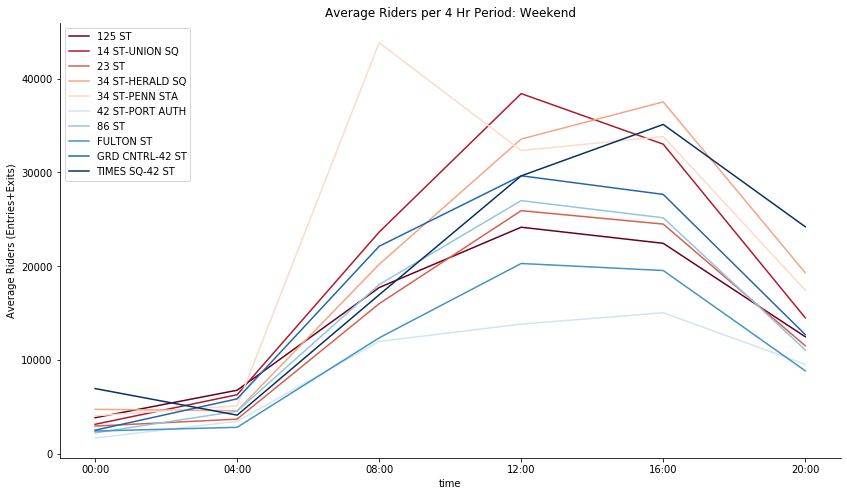

In [41]:
xlist = []
ylist = []
legends = []
for station in top10_intra_weekend_bytime['STATION'].unique():
    mask_loop = ((top10_intra_weekend_bytime["STATION"] == station))
    xlist.append(top10_intra_weekend_bytime[mask_loop]['TIME'])
    print([x for x in top10_intra_weekend_bytime[mask_loop]['TIME']])
    ylist.append(top10_intra_weekend_bytime[mask_loop]['TOTAL_DELTA'])
    legends.append(station)
    
x_tick_labels = ["00:00","4:00","8:00","12:00","16:00","20:00"] #ask about this
     
lineplot(xlist,ylist,title="Average Riders per 4 Hr Period: Weekend",legends=legends,x_tick_labels=x_tick_labels,y_label='Average Riders (Entries+Exits)')
plt.savefig('weekend.svg')


In [37]:
top10_intra_workweek_bytime = (top10_intra_workweek
                               .groupby(['STATION','TIME'])['TOTAL_DELTA']
                               .mean()
                               .reset_index())

top10_intra_workweek_bytime.head(10)

,STATION,TIME,TOTAL_DELTA
0,125 ST,00:00:00,2486.978
1,125 ST,04:00:00,22714.800
2,125 ST,08:00:00,28493.600
3,125 ST,12:00:00,31538.044
4,125 ST,16:00:00,35827.756
5,125 ST,20:00:00,13670.614
6,14 ST-UNION SQ,00:00:00,1552.244
7,14 ST-UNION SQ,04:00:00,29080.667
8,14 ST-UNION SQ,08:00:00,41378.111
9,14 ST-UNION SQ,12:00:00,49512.356


[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), date

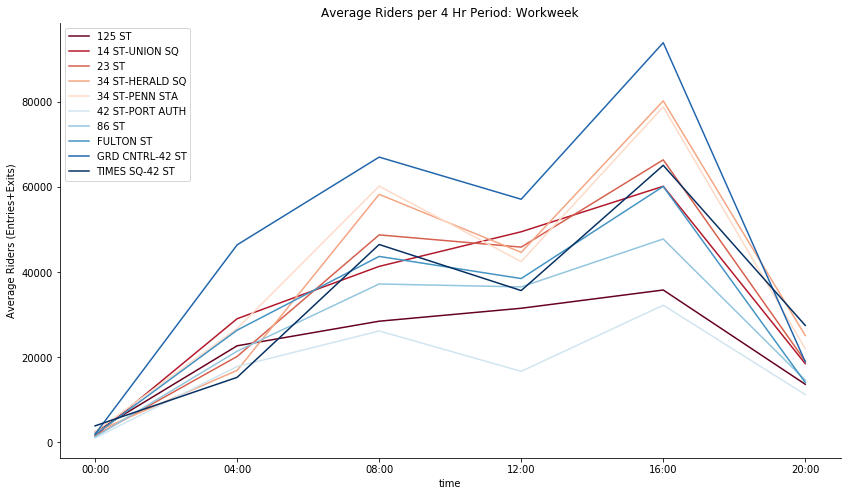

In [42]:
xlist = []
ylist = []
legends = []
for station in top10_intra_workweek_bytime['STATION'].unique():
    mask_loop = ((top10_intra_workweek_bytime["STATION"] == station))
    xlist.append(top10_intra_workweek_bytime[mask_loop]['TIME'])
    print([x for x in top10_intra_workweek_bytime[mask_loop]['TIME']])
    ylist.append(top10_intra_workweek_bytime[mask_loop]['TOTAL_DELTA'])
    legends.append(station)
    
x_tick_labels = ["00:00","4:00","8:00","12:00","16:00","20:00"] #ask about this
     
lineplot(xlist,ylist,title="Average Riders per 4 Hr Period: Workweek",legends=legends,x_tick_labels=x_tick_labels,y_label='Average Riders (Entries+Exits)')
plt.savefig('workday.svg')
